<img src="https://snipboard.io/Kx6OAi.jpg">

# Session 0. System Check: Configuration and Review
<div style="margin-top: -20px;">Author:  David Yerrington</div>

## Learning Objectives

- Install your Python Environment
- Run Jupyter Lab
- Test Dask / Debug
- Reveiw of Pandas

### Prerequisite Knowledge
- Basic Pandas 
  - Difference between Series vs Dataframe
  - Bitmasks, query function, selecting data
  - Aggregations

## Environment Setup

We will first review some basic points to setup Python and the environment to start in [the setup guide](../environment.md).


# First! Does Dask Work?

Because Dask can be a bit tricky on different platforms. We will test this first and then with the remaining time, do a brief review of Pandas.

First, we will initialize a local cluster.

> If you see `distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available` you are likely using Windows for Subsystem Linux (WSL) Version 1.  This isn't going to be a problem, as it's just a warning.  It is recommended that you upgraade to WSLv2 at some point in the future to avoid this warning.

In [2]:
from dask.distributed import Client
import dask.array as da
import pandas as pd

client = Client()
client

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP st

Client Scheduler: tcp://127.0.0.1:4352 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.11 GB


distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


### Demo Data

The following code is only for demonstration purposes.  We just want to load up some data and test Dask to insure that its working before going forward.

In [3]:
x = da.random.random((10000, 10000, 10), chunks = (1000, 1000, 5))
y = da.random.random((10000, 10000, 10), chunks = (1000, 1000, 5))
z = (da.arcsin(x) + da.arccos(y)).sum(axis = (1, 2))
z

dask.array<sum-aggregate, shape=(10000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>

### Will it compute!?

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.32859 to fit


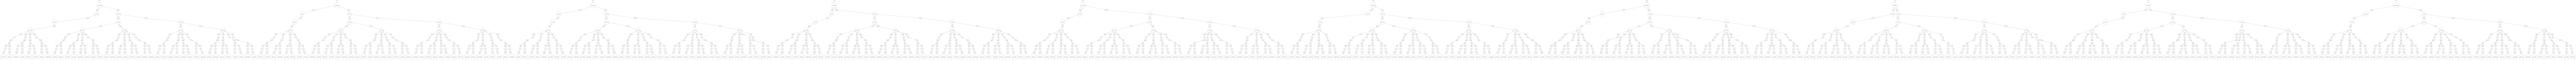

In [6]:
z.visualize()

In [5]:
z.compute()

array([157201.10642189, 157146.54079971, 157113.40805188, ...,
       157338.71755244, 157004.86205869, 157219.85607241])

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


# 1. Pandas Review:  Introduction

The most common problems we face working with data include:
- Access
- Exploration
- Transformation

Most problems in the world involve acquiring data in some form, understanding it enough to scope projects, then changing a portion of data in some way to clean, model, or create more datasets!  Pandas is our multi-tool of sorts when it comes to exploring the potential for applications with data.  The faster you can work within Pandas to explore and transform data, the easier it will be to produce most projects.

## 1.1 What is Pandas?

It's likely the vast majority of people attending this session are familliar with Pandas.  For everyone else, Pandas is a multi-purpose data library that provide access to data, data transformation, and data encoding.  It's a Python library that is popular amongst engineers, analysis, and data scientists.

## 1.2 Use Cases

Python has a vast library of different tools and it's arguably the most popular choice for data practioners.  The ecosystem includes data visualization, web services, database platforms, and machine learning to name a few domains.

- Working with mobile game data with semi-structured data
- Log files
- Text analytics 
- Writing methods using apply and map rather than manual iteration
- Prototyping machine learning processes


## Imports

In [7]:
import pandas as pd
from dask.distributed import Client
import dask.array as da

## Load a dataset

This is a Pokemon dataset and it's from [Kaggle](https://www.kaggle.com/terminus7/pokemon-challenge).  

> Pokemon are creatures that fight each other, in a turn-based RPG game.  Nothing is more practical than Pokemon data.

In [8]:
df = pd.read_csv("../data/pokemon.csv", encoding = "utf8")

## 2.1 Series vs. DataFrame

![](https://snipboard.io/8i3yIz.jpg)

### Selecting Series:  Row

In [10]:
df.loc[0]

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

### Selecting Series: Column

In [11]:
df.loc[:, 'Name']

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Mega Venusaur
4          Charmander
            ...      
795           Diancie
796      Mega Diancie
797    Hoopa Confined
798     Hoopa Unbound
799         Volcanion
Name: Name, Length: 800, dtype: object

### Question: Is the object `df.columns` a series or a DataFrame?
Follow up:  How would you find out?

In [14]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

## 2.2 `.loc` and `.iloc`
### Selecting all rows, all columns

> `.iloc` is extremely useful for when you want to programatically access columns when you might not know the names of the columns explicitly.  This is of particular use when writing scripts to automate the process of cleaning data.

### Selecting all rows, specific columns

## 3. Selecting data 

### With Masks

Selection of data in Pandas is performed by passing a series of True/False values which are interpreted as "show" or "hide" for rows with the same numeric index.

Lets see this on a basic dataset that we create first.

In [37]:
basic_data = [
    ("Cat"),
    ("Bat"),
    ("Rat"),
    ("Wombat") # this is the best row
]
basic_df = pd.DataFrame(basic_data, columns = ["animal"])
basic_df

,animal
0,Cat
1,Bat
2,Rat
3,Wombat


In [50]:
## Selecting only the first row "cat"
mask = []

In [51]:
## Selecting only the second and fouth rows for "bat" and "wombat"
mask = []

In [52]:
mask = basic_df['animal'] == "Wombat"

> At this point we may conclude with a review in preference of other material.  For anyone coming in with very little experience, I try to design these notebooks to be accessible so we don't need to go over everything in the live session.

## 3. Selecting data 

### With Masks

Selection of data in Pandas is performed by passing a series of True/False values which are interpreted as "show" or "hide" for rows with the same numeric index.

Lets see this on a basic dataset that we create first.

In [42]:
## Selecting only the first row "cat"
mask = [True, False, False, False]
basic_df[mask]

,animal
0,Cat


In [43]:
## Selecting only the second and fouth rows for "bat" and "wombat"
mask = [False, True, False, True]
basic_df[mask]

,animal
1,Bat
3,Wombat


In [44]:
mask = basic_df['animal'] == "Wombat"
basic_df[mask]

,animal
3,Wombat


## This also works with `.loc` and `.iloc`

In [45]:
basic_df.loc[mask, ['animal']]

,animal
3,Wombat


So when we use basic conditional statements with Pandas to select data, they are actually creating a `boolean` series of `True` and `False` values that match the rows they coorespond to for selection.

In [46]:
basic_df.iloc[[0,1,3]]

,animal
0,Cat
1,Bat
3,Wombat


## Using `.query()`

Query is a useful method in Pandas to quickly select data in a "sql-like" manner.

In [53]:
basic_df

The `.query` method is great for exploring data but it does have some tradeoffs.


- You can refer to column names that contain spaces or operators by surrounding them in backticks. Also columns that begin with digits need to be escaped.
- You still need to escape columns that are named as reserved words but sometimes this breaks query I've found. ie: Column named as `class`.

## 4. `.info()` and Data Types

# Summary

By now you should have your Jupyter environment setup and running and be familliar with some core Pandas concepts:

* `.loc` and `.iloc` select data by row and column.  `.loc` allows you to select columns by name.  `.iloc` provides selection of columns by index which is useful for programatic access.
* Data is selected at the row level by boolean series called "masks".  Conditional operators create these boolean sequences and control the selection and display of DataFrames.
* `.describe()` is a handy function that automatically provides the most common aggregation methods across all numerical values in the dataset.
* `.groupby("[key column]")` aggregates data matching the key column parameter into groups of rows matching the same key. 